In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import csv

import sys
import re
from tweepy import OAuthHandler
from tweepy import API


auth = tweepy.OAuthHandler("IrFYHS6JGhP549kIiMyhFQPUl", "8TZx5nqPe6YYtPpcbVkzAEUOCWkNQR0xJNnzN5wnIkelzWf3Y5")
auth.set_access_token("274959579-PTG33hMz2Wi9saH2y9lqfOoIpzBFxTcIjvlFnZYv","25DeuaYF18R3kZy7tKNYnrJDd992dX0uYVd7tu0oVQ8oT")
api = tweepy.API(auth)

In [2]:
from tweepy import Stream
from tweepy.streaming import StreamListener

In [3]:
keywords_to_track = ['Israel','Palestine']

tweet_count=0

n_tweets=10000

class listener(StreamListener):
    
    def on_data(self, data):
        global tweet_count
        global n_tweets
        global stream
        
        if tweet_count < n_tweets:
            with open('fetched.txt','a') as tf:
                tf.write(data)
            tweet_count = tweet_count + 1
            return True
        else:
            print('done')
            stream.disconnect()
       
    def on_error(self, status):
        print (status)
        


sl = listener()


stream = Stream(auth,sl)

stream.filter(track=keywords_to_track)
    
    


ProtocolError: ('Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read))

In [4]:
stream.disconnect()
tweets_data_path="fetched.txt"
tweets_data=[]

tweets_file=open(tweets_data_path,"r")
for line in tweets_file:
    try:
        tweet=json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
  
        

tweets=pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets.head()


,text,Timestamp
0,RT @IbtisamMalik10: Naara ae Awaam da\nIsrael ...,Wed May 19 06:05:28 +0000 2021
1,RT @AyeshaASiddiqi: i don’t think enough Ameri...,Wed May 19 06:05:28 +0000 2021
2,RT @ChrisDeLeon: reminder: AP correctly identi...,Wed May 19 06:05:28 +0000 2021
3,RT @wan_ilham: Ni bukan israel jer koyak. Majl...,Wed May 19 06:05:29 +0000 2021
4,RT @adamelmahrek: Dear ⁦@nytimes⁩ \n\nWe’re Pa...,Wed May 19 06:05:28 +0000 2021


In [5]:
tweets_data[1]

{'created_at': 'Wed May 19 06:05:28 +0000 2021',
 'id': 1394896972679503873,
 'id_str': '1394896972679503873',
 'text': 'RT @AyeshaASiddiqi: i don’t think enough Americans understand how literal it is when Palestinians describe what is happening to them. settl…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1306637113958363136,
  'id_str': '1306637113958363136',
  'name': 'soo.yaa',
  'screen_name': 'Nope10054291',
  'location': None,
  'url': None,
  'description': 'She/Her\n\n90 year old Grandma stuck in the body of a 19 year old\n\nNot interested.\n\nBlink ot4 💗\nArmy ot7💜',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 13,
  'friends_count': 138,
  'listed_count': 0,
  'favourites_co

In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7892 entries, 0 to 7891
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       7892 non-null   object
 1   Timestamp  7892 non-null   object
dtypes: object(2)
memory usage: 123.4+ KB


In [7]:
def check_word(word,data):
    contains=data['text'].str.contains(word,case=False)
    return contains

In [8]:
tweets['Timestamp']

0       Wed May 19 06:05:28 +0000 2021
1       Wed May 19 06:05:28 +0000 2021
2       Wed May 19 06:05:28 +0000 2021
3       Wed May 19 06:05:29 +0000 2021
4       Wed May 19 06:05:28 +0000 2021
                     ...              
7887    Wed May 19 06:10:28 +0000 2021
7888    Wed May 19 06:10:28 +0000 2021
7889    Wed May 19 06:10:28 +0000 2021
7890    Wed May 19 06:10:28 +0000 2021
7891    Wed May 19 06:10:28 +0000 2021
Name: Timestamp, Length: 7892, dtype: object

In [9]:
tweets['Timestamp']=pd.to_datetime(tweets['Timestamp'])

In [10]:
tweets['Timestamp']

0      2021-05-19 06:05:28+00:00
1      2021-05-19 06:05:28+00:00
2      2021-05-19 06:05:28+00:00
3      2021-05-19 06:05:29+00:00
4      2021-05-19 06:05:28+00:00
                  ...           
7887   2021-05-19 06:10:28+00:00
7888   2021-05-19 06:10:28+00:00
7889   2021-05-19 06:10:28+00:00
7890   2021-05-19 06:10:28+00:00
7891   2021-05-19 06:10:28+00:00
Name: Timestamp, Length: 7892, dtype: datetime64[ns, UTC]

In [11]:
tweets=tweets.set_index('Timestamp')
tweets.head(10)

,text
Timestamp,
2021-05-19 06:05:28+00:00,RT @IbtisamMalik10: Naara ae Awaam da\nIsrael ...
2021-05-19 06:05:28+00:00,RT @AyeshaASiddiqi: i don’t think enough Ameri...
2021-05-19 06:05:28+00:00,RT @ChrisDeLeon: reminder: AP correctly identi...
2021-05-19 06:05:29+00:00,RT @wan_ilham: Ni bukan israel jer koyak. Majl...
2021-05-19 06:05:28+00:00,RT @adamelmahrek: Dear ⁦@nytimes⁩ \n\nWe’re Pa...
2021-05-19 06:05:28+00:00,@Adr14ntie Ga pernah belajar sejarah tu orang ...
2021-05-19 06:05:29+00:00,RT @RabbiWolpe: Why doesn’t Israel offer the P...
2021-05-19 06:05:29+00:00,DYING LMAAOOO
2021-05-19 06:05:29+00:00,"RT @JesHealy: At least 52,000 people displaced..."


In [12]:
tweets['Israel']=check_word('Israel',tweets)
tweets['Palestine']=check_word('Palestine',tweets)
tweets.head(10)

,text,Israel,Palestine
Timestamp,,,
2021-05-19 06:05:28+00:00,RT @IbtisamMalik10: Naara ae Awaam da\nIsrael ...,True,False
2021-05-19 06:05:28+00:00,RT @AyeshaASiddiqi: i don’t think enough Ameri...,False,False
2021-05-19 06:05:28+00:00,RT @ChrisDeLeon: reminder: AP correctly identi...,True,False
2021-05-19 06:05:29+00:00,RT @wan_ilham: Ni bukan israel jer koyak. Majl...,True,False
2021-05-19 06:05:28+00:00,RT @adamelmahrek: Dear ⁦@nytimes⁩ \n\nWe’re Pa...,True,False
2021-05-19 06:05:28+00:00,@Adr14ntie Ga pernah belajar sejarah tu orang ...,False,False
2021-05-19 06:05:29+00:00,RT @RabbiWolpe: Why doesn’t Israel offer the P...,True,False
2021-05-19 06:05:29+00:00,DYING LMAAOOO,False,False
2021-05-19 06:05:29+00:00,"RT @JesHealy: At least 52,000 people displaced...",True,True


In [13]:
mean_israel=tweets['Israel'].resample('1 min').mean()
mean_palestine=tweets['Palestine'].resample('1 min').mean()

In [14]:
tweets['Israel'].describe()

count      7892
unique        2
top       False
freq       4237
Name: Israel, dtype: object

In [15]:
mean_israel

Timestamp
2021-05-19 06:05:00+00:00    0.471178
2021-05-19 06:06:00+00:00    0.461027
2021-05-19 06:07:00+00:00    0.443657
2021-05-19 06:08:00+00:00    0.483161
2021-05-19 06:09:00+00:00    0.450867
2021-05-19 06:10:00+00:00    0.482803
Freq: T, Name: Israel, dtype: float64

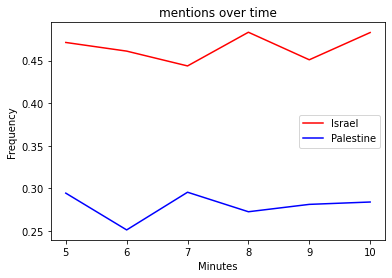

In [21]:
plt.plot(mean_israel.index.minute , mean_israel , color='r')
plt.plot(mean_palestine.index.minute,mean_palestine, color='blue')
plt.title('mentions over time')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.legend(('Israel','Palestine'))

plt.show()

In [30]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yashs\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid= SentimentIntensityAnalyzer()

sentiment_score=tweets['text'].apply(sid.polarity_scores)

In [35]:
sentiment_score[0]

{'neg': 0.125, 'neu': 0.875, 'pos': 0.0, 'compound': -0.3164}

In [36]:
sentiment=sentiment_score.apply(lambda x: x['compound'])

In [40]:
print(tweets[sentiment >0.6]['text'].values[0])
print(tweets[sentiment <0.6]['text'].values[0])

RT @adamelmahrek: Dear ⁦@nytimes⁩ 

We’re Palestinian citizens of Israel, not Israeli Arabs. Please respect us and allow us to name ourselv…
RT @IbtisamMalik10: Naara ae Awaam da
Israel Haraam da! 
(I literally chanted this in the protest lol) 😂


In [43]:
sentiment

Timestamp
2021-05-19 06:05:28+00:00   -0.3164
2021-05-19 06:05:28+00:00    0.0000
2021-05-19 06:05:28+00:00   -0.7717
2021-05-19 06:05:29+00:00    0.0000
2021-05-19 06:05:28+00:00    0.6846
                              ...  
2021-05-19 06:10:28+00:00    0.0000
2021-05-19 06:10:28+00:00   -0.2263
2021-05-19 06:10:28+00:00    0.0000
2021-05-19 06:10:28+00:00   -0.2960
2021-05-19 06:10:28+00:00    0.0000
Name: text, Length: 7892, dtype: float64

In [46]:
sentiment_israel=sentiment[check_word('israel', tweets)].resample('1 min').mean()
sentiment_palestine=sentiment[check_word('palestine',tweets)].resample('1 min').mean()

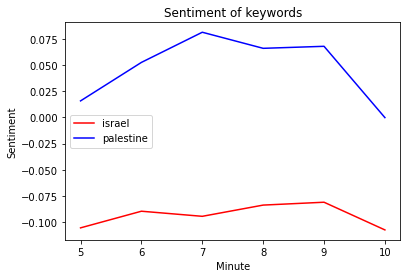

In [47]:
plt.plot(sentiment_israel.index.minute,sentiment_israel , color='red')
plt.plot(sentiment_palestine.index.minute,sentiment_palestine,color='blue')
plt.xlabel('Minute')
plt.ylabel('Sentiment')
plt.title('Sentiment of keywords')
plt.legend(('israel', 'palestine'))
plt.show()